In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datasets import BaseDataset, ExpertDataset, DatasetFromSubset
import transforms as T
import PIL

In [3]:
base_transforms = T.Compose(
    [
        T.ToTensor(),
        T.Resize((256, 256)),
    ]
)

transforms = T.Compose(
    [*base_transforms, T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

dataset = BaseDataset("../data/", transform=transforms, with_background=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


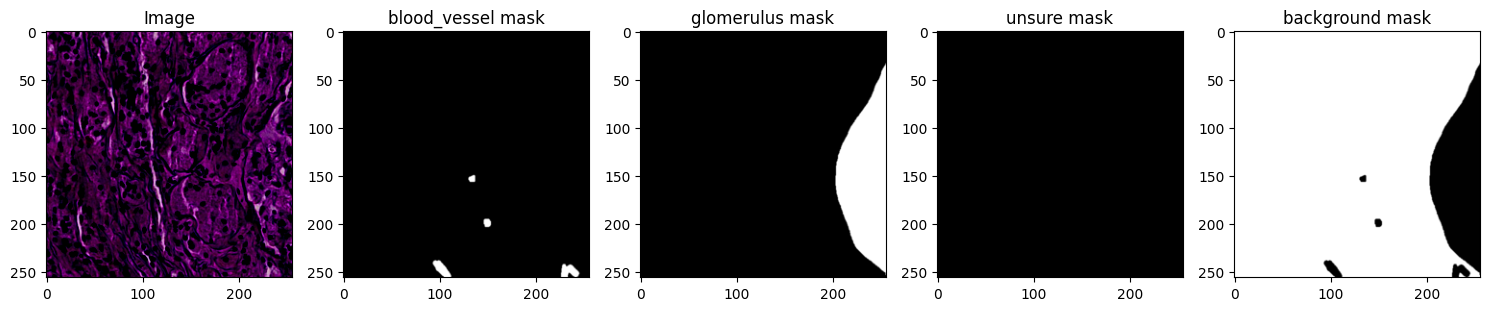

In [3]:
dataset.plot_example(5)

In [72]:
from skimage.color import label2rgb
import torch
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt

In [132]:
idx = 1

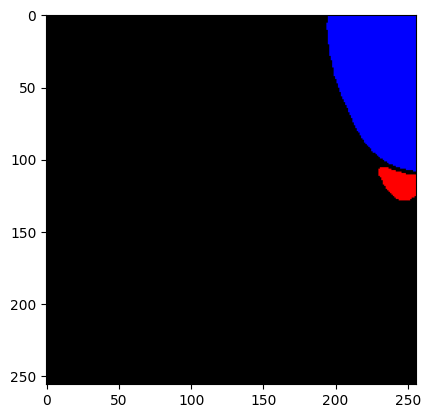

In [145]:
image, target = dataset.get(idx, transform=base_transforms)
image_np = image.permute(1, 2, 0).numpy()

target_argmax = target.argmax(dim=0)
target_np = target_argmax.numpy()

image_label_overlay = label2rgb(
    target_np,
    image=None,
    bg_label=3,
    colors=["red", "blue", "yellow"],
    kind="overlay",
    saturation=1.0,
    alpha=0.3,
)

plt.imshow(image_label_overlay)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


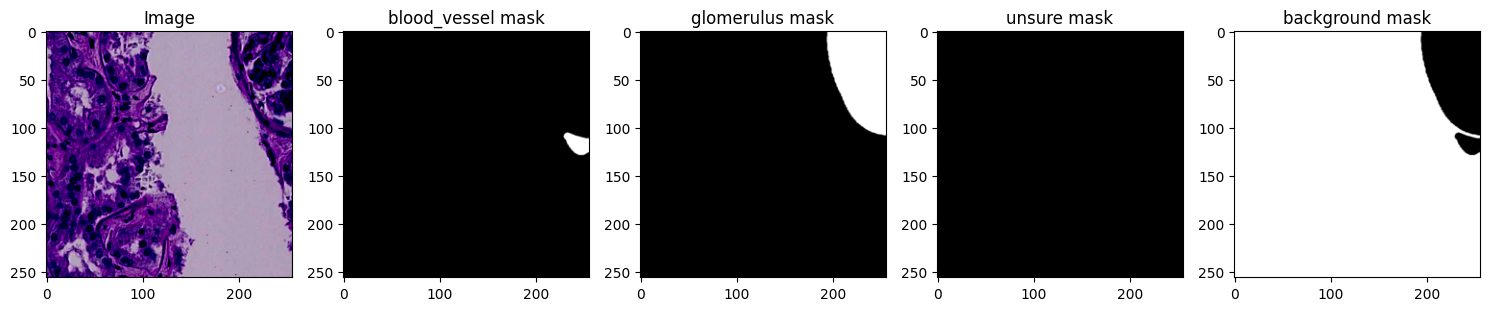

In [141]:
dataset.plot_example(idx)